## 0. Computer vision library in PyTorch

* **torchvision**- base domain library for pytorch computer vision 
* **torchvision.datasets** - get datasets and loading functions for computer vision 
* **torchvision.models** - get pretrained computer vision models that you can leverage for your own problems
* **torchvision.transforms** - functions for manipulating your vision data(images) to be sutible for use with an ML model
* **torch.utils.data.Dataset** - Base datasets class for Pytorch.
* **torch.utils.data.DataLoader** - Create a python iterable over dataset

In [1]:
# PyTorch computer vision
import torch 
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization 
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


1.12.1
0.13.1


## 1. Gatting a dataset
The dataset well'be using is FashionMNIST

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]  # See the first training example
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check input and output shapes of data

In [8]:
# check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, weight]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, weight]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


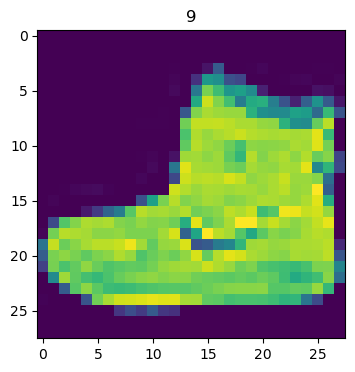

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.figure(figsize=(4,4))
plt.imshow(image.squeeze())
plt.title(label);

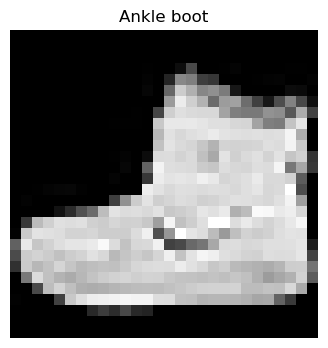

In [10]:
plt.figure(figsize=(4,4))
plt.imshow(image.squeeze(), cmap="gray")   # cmap = color map
plt.title(class_names[label]);
plt.axis(False); # remove axis from image

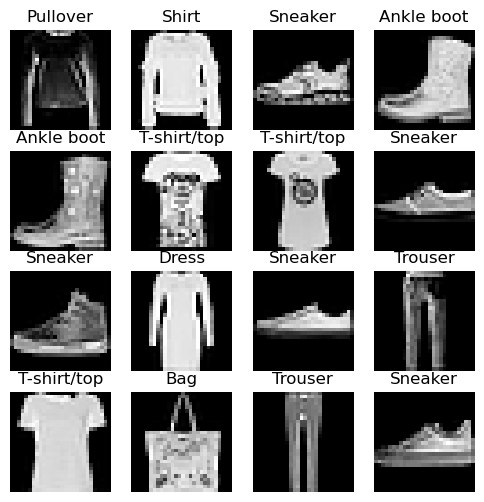

In [11]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(6,6))
row, cols = 4,4
for i in range(1, row*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(row, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader

Right now, our data is in the from of Pytorch datasets.

DataLoader turns our datasets into Python itrable.

More specifically, we want turn our data into batch (or mini-batches).

why would we do this ?

    1. It is more computationally efficient as in, your computing hardware may not able to look (store in memory) at 60000
       images in one hit. so we break to 32 images at a time (batch size of 32).
    2. It gives our neural network more chances to update its gradient descent per epoch.


In [13]:
from torch.utils.data import DataLoader  # convert data into batchs

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch? 
                              shuffle=True # shuffle data every epoch?
                              )

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False # don't necessarily have to shuffle the testing data
                             )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x26c212dbcd0>,
 <torch.utils.data.dataloader.DataLoader at 0x26c21223310>)

In [14]:
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

Lenght of train_dataloader: 1875 batches of 32...
Lenght of test_dataloader: 313 batches of 32...


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


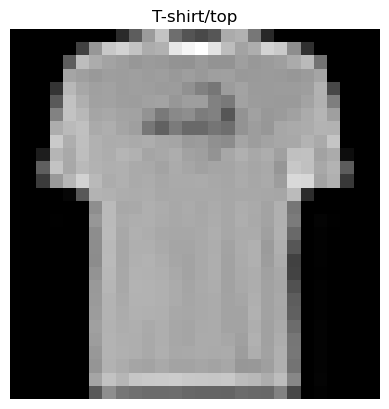

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Model 0: Build a basline model

When starting to build of machine learning experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

in other world: start simply add complexity when necessary.

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten() # flatten = સપાટ કરવું
# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten = સપાટ કરવું # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## Setup loss, optimizer and evaluation metrics

* loss function - since we're working with multi-class data, our loss function will be **nn.CrossEntorpyLoss()** 
* Optimizer - our optimizer torch.optim.SGD() (stochastic gradient descent)
* Evaluation metric - since we're working on a classifiction problem, let's use accruacy as our model evaluation matrix

In [21]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [22]:
# Import accuracy metic
from helper_functions import accuracy_fn

# Setup loss funtion and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learing is very experimental.

Two of the main things you'll often want to track are:

    1. Model's performance (loss and accuracy value etc)
    2. How fast it runs

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    " " " Print difference between start and end time. " " " 
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [24]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start = start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


6.540000000043733e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's hapening.
5. Time it all(for fun).

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y_test) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test accuracy average per batch
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.3f} | Test loss: {test_loss:.3f}, Test acc: {test_acc:.3f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.590 | Test loss: 0.510, Test acc: 82.039%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.476 | Test loss: 0.480, Test acc: 83.197%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.455 | Test loss: 0.477, Test acc: 83.427%

Train time on cpu: 45.651 seconds


In [26]:
str(next(model_0.parameters()).device)

'cpu'

## 4 Make predition and get Model 0 results

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Return a dictonary containing the result of model predicting on data_loader."""
    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
            
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
                "model_loss": loss.item(),
                "model_acc" : acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# GPU

## Setup device agnostic-code (for using a GPU if there is one)

In [28]:
torch.cuda.is_available()

False

In [29]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

In [30]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten input into a single vector
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [31]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, # this is the output of the flatten afrer our 28*28 image goes in
                              hidden_units=10,
                              output_shape = len(class_names)).to(device) # if GPU availble then GPU outerwise CPU 
next(model_1.parameters()).device

device(type='cpu')

In [32]:
# setup loss function and optimizer and evaluation merics 

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr= 0.1) # tries to update our model's parameters to reduce loss

### 6.2 Functionizing train and evaluation/testing loops

Let's create a function for:
* train loop - **train_step()**
* testing loop - **test_step()**

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """ Performs a training with model trining to learn on data_loader. """
    train_loss, train_acc = 0, 0
 
    # Put model into traning mode
    model.train() 
    
    
    ### Training
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(data_loader):
        # put data on target device 
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass (output the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by and acc length of train dataloader (average loss per batch per epoch)
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f}  |  Train acc: {train_acc:.2f}%")

In [34]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0,0
    
    # Put the model in eval mode
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            # send data to the target devices
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass (output raw logits)
            test_pred = model(X)
            
            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y)
            
            # 3. Calculate the accuracy 
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels
        
        test_loss /= len(data_loader)  # calculate the test loss average per batch
        
        test_acc /= len(data_loader)  # calculate the test accuracy average per batch
        
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [35]:
torch.manual_seed(42)

# Measure time 
from timeit import default_timer as timer
train_time_start = timer()

# Set epochs
epochs = 3

# Create a optimizer and evalution loop using train_srep() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    
    train_step(model = model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device= device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end = timer()
total_train_time_model_1 = print_train_time(start = train_time_start, end = train_time_end, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199  |  Train acc: 61.34%
Test loss: 0.95637 | Test acc: 65.00%

Epoch: 1
-------
Train loss: 0.78101  |  Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-------
Train loss: 0.67027  |  Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 51.755 seconds


In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [37]:
total_train_time_model_0

45.651422

In [38]:
# Get model_1 results dictonary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [39]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """Return a dictonary containing the result of model predicting on data_loader."""
    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
            
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
                "model_loss": loss.item(),
                "model_acc" : acc}

In [40]:
# Get model_1 results dictonary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [41]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

* CNN's are also known ConvNets.
* CNN algorithm used to recognise patterns in data. (check website cnn-explainer )

In [42]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """Model architeture that replicates the TinyVGG
       model from CNN explainer website. """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)    
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,  # there's a trick to calculating this....
                      out_features=output_shape)
        )
        
        
        
    def forward(self, x):
        x = self.conv_block_1(x)
#         print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
#         print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
#         print(f"Output shape of classifier: {x.shape}")
        return x

In [43]:
image.shape

torch.Size([1, 28, 28])

In [44]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10, 
                              output_shape=len(class_names)).to(device)

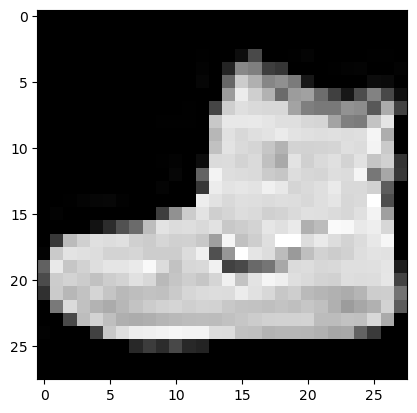

In [45]:
plt.imshow(image.squeeze(), cmap="gray")

In [46]:
10*7*7

490

In [47]:
# Pass image through model
model_2(image.unsqueeze(dim=0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through 'nn.Conv2d'



In [48]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [49]:
test_image.shape

torch.Size([3, 64, 64])

In [50]:
torch.manual_seed(42)
# Create a single conv2d
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through **nn.MaxPool2d()** 

In [51]:
# Pint out original image shape without unsqueezed dimension 
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape afeter going therough conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape afeter going therough conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [52]:
torch.manual_seed(42)
# Create a random tensor with a similier number of dimention to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"Max pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 setup loss function and optimizer for model_2

In [53]:
# setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model_2 using our training and test functions


In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model = model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model = model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.58962  |  Train acc: 78.56%
Test loss: 0.40265 | Test acc: 85.45%

Epoch: 1
-----
Train loss: 0.35995  |  Train acc: 87.00%
Test loss: 0.34961 | Test acc: 86.94%

Epoch: 2
-----
Train loss: 0.32103  |  Train acc: 88.31%
Test loss: 0.32116 | Test acc: 88.56%

Train time on cpu: 260.380 seconds


In [55]:
# Get model_2 results 
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32115837931632996,
 'model_acc': 88.55830670926518}

## 8. compare model results and training time

In [56]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321158,88.558307


In [57]:
compare_results['Training Time'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,Training Time
0,FashionMNISTModelV0,0.476639,83.426518,45.651422
1,FashionMNISTModelV1,0.685001,75.019968,51.754643
2,FashionMNISTModelV2,0.321158,88.558307,260.380415


Text(0, 0.5, 'model')

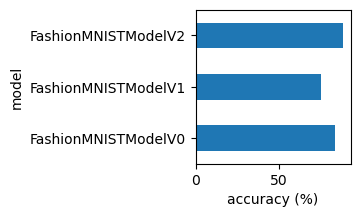

In [58]:
# Visulize our model results
plt.figure(figsize=(2,2))
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predicions with best model

In [59]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward pass(model outputs raw logits)
            pred_logit = model(sample)
            
            # Get predicion propability (logit -> predicion probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [60]:
img,label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [61]:
import random 
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

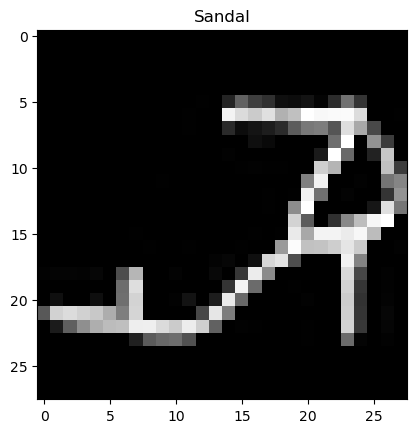

In [62]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [63]:
# Make predicions 
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two predicion probabilities
pred_probs[:2]

tensor([[4.8414e-08, 2.7702e-10, 2.8152e-08, 2.6420e-10, 6.9237e-09, 1.0000e+00,
         9.1197e-07, 2.7381e-08, 1.9007e-06, 4.7653e-07],
        [4.0099e-01, 5.7296e-05, 2.6340e-01, 1.2506e-01, 2.6171e-03, 4.0221e-04,
         2.0607e-01, 1.0488e-04, 1.2730e-03, 1.2409e-05]])

In [64]:
# Prediction probabilites to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 0, 7, 9, 5, 3, 6, 5])

In [65]:
test_labels

[5, 3, 0, 7, 9, 5, 3, 6, 5]

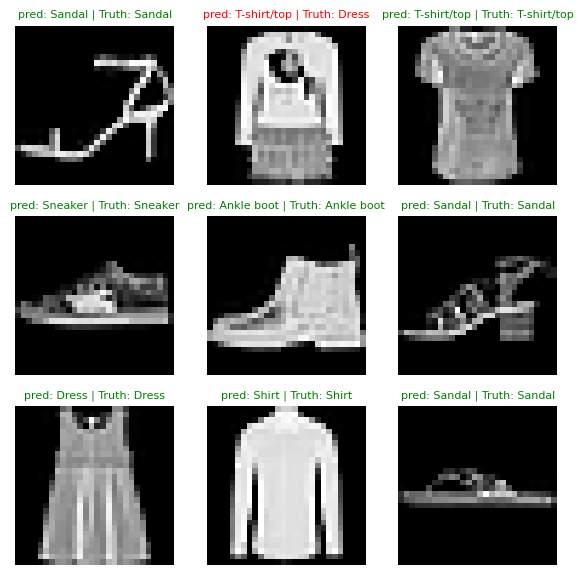

In [66]:
# Plot predicions
plt.figure(figsize=(7,7))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')
    
    # Find the predicion (in text form, e.g "sandal")
    pred_label = class_names[pred_classes[i]]
    
    # Get the truth label(in text form)
    truth_label = class_names[test_labels[i]]
    
    # Create a title for the plot
    title_text = f"pred: {pred_label} | Truth: {truth_label}"
    
    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=8, c='g')
    else:
        plt.title(title_text, fontsize=8, c='r')
    
    plt.axis(False);

## 10. Making a confusion matrix

Counfusion matrix: It's a fentastic way of evaluating your classification model

1. Make predicions with our train model on the test dataset
2. Make a confusion matrix "**torchmetrics.ConfusionMatrix**"
3. Plot the confusion matrix using "**mlxtend.plotting.plot_confusion_matrix()**"

In [67]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predicions with our train model on the test dataset
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions......"):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # logits -> predicion probabilities -> predicion labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU for evaluation 
        y_preds.append(y_pred.cpu())
        
# Concatenate list of predicions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions......:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [68]:
len(y_pred_tensor)

10000

In [69]:
# See if required packages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
    !pip install -U torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0
mlxtend version: 0.21.0


In [70]:
import torchmetrics
import mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


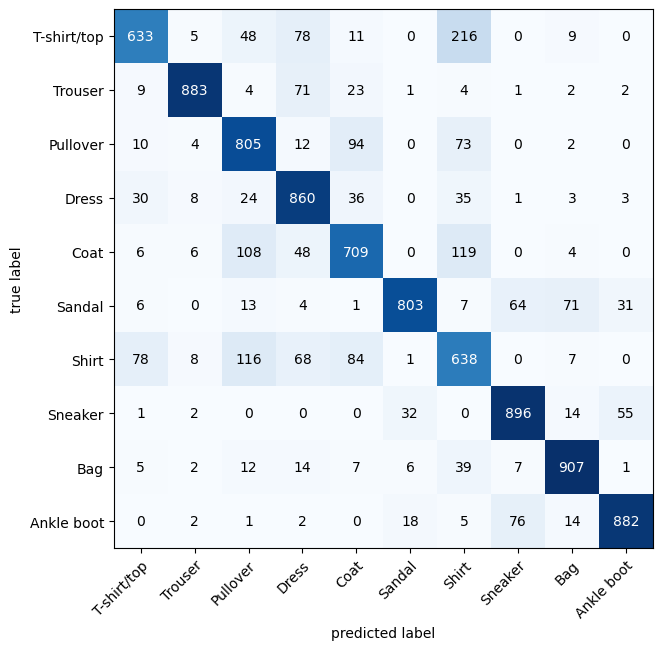

In [71]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2 Setup confusion instance and compare prdicions to targets
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),  #  matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load best performing model

There are three main methods you should about for saving and loading models in PyTorch. 

1. **torch.save()**- allows you a PyTorch object in pytorch's pickle format 

2. **torch.load()** - allows you a saved PyTorch object 

3. **torch.nn.Module.load_state_dict()** - this allows to load a model' s saved state dictionary

In [72]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models\03_pytorch_computer_vision_model_2.pth


In [73]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn, 
                                    accuracy_fn=accuracy_fn
                                   )
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_2_results

In [ ]:
# Check if model results are close to each other 
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))